In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy as sp
%matplotlib inline

import glob

## Reading several aeronet files in a folder and concatenation

In [3]:
folder_path = 'D:\SERGIO\Python\AERONET' # indicate the path to folder where the file(s) are located

file_list = glob.glob(folder_path + "/*.lev15")  # ask for the list of .xxx files in the folder

print(len(file_list))

main_dataframe = pd.DataFrame(pd.read_table(file_list[0], delimiter=',',header = 6, na_values=(-999)))

sites_list = [main_dataframe["AERONET_Site_Name"][1]]
sites_lat = [main_dataframe["Site_Latitude(Degrees)"][1]]
sites_lon =[ main_dataframe["Site_Longitude(Degrees)"][1]]
sites_alt = [main_dataframe["Site_Elevation(m)"][1]]
  

    
    
for i in range(1,len(file_list)):
    data = pd.read_table(file_list[i], delimiter=',',header = 6, na_values=(-999))
    
    df = pd.DataFrame(data)
    
    main_dataframe = pd.concat([main_dataframe, df])
    
    sites_list.append(df["AERONET_Site_Name"][1])
    sites_lat.append(df["Site_Latitude(Degrees)"][1])
    sites_lon.append(df["Site_Longitude(Degrees)"][1])
    sites_alt.append(df["Site_Elevation(m)"][1])
    
main_dataframe["date"] = pd.to_datetime(main_dataframe['Date(dd:mm:yyyy)']+ ' ' + 
                                        main_dataframe['Time(hh:mm:ss)'], 
                                        format="%d:%m:%Y %H:%M:%S" , dayfirst=True)

main_dataframe = main_dataframe.set_index('date')


use_cols = ["AOD_1020nm","AOD_870nm", "AOD_675nm", 
            "AOD_500nm", "AOD_440nm", "440-870_Angstrom_Exponent",
            "AERONET_Site_Name","Site_Latitude(Degrees)",
           "Site_Longitude(Degrees)","Site_Elevation(m)"]

data = main_dataframe[use_cols]


print(sites_list)
print(sites_lat)
print(sites_lon)
print(sites_alt)
print(data.shape)

34
['ATHENS-NOA', 'Barcelona', 'Ben_Salem', 'Birkenes', 'Burjassot', 'Cabo_da_Roca', 'CUT-TEPAK', 'El_Arenosillo', 'Evora', 'Finokalia-FKL', 'Gozo', 'Granada', 'Hamburg', 'Helsinki', 'Ispra', 'Kuopio', 'Lampedusa', 'Lecce_University', 'Leipzig', 'Lille', 'Madrid', 'Mainz', 'Minsk', 'Modena', 'Moldova', 'Munich_University', 'Palencia', 'Palgrunden', 'Palma_de_Mallorca', 'Saada', 'Santa_Cruz_Tenerife', 'Tamanrasset_INM', 'Thessaloniki', 'Toulouse_MF']
[37.9721, 41.38925, 35.55055, 58.38845, 39.507, 38.781722, 34.674806, 37.105, 38.567833, 35.337712, 36.034139, 37.164, 53.568333, 60.203733, 45.80305, 62.892414, 35.516667, 40.335111, 51.3525, 50.611667, 40.4519, 49.999, 53.92, 44.631667, 47.0008, 48.148, 41.988572, 58.755333, 39.5533, 31.62583, 28.472528, 22.79, 40.63, 43.57261]
[23.718, 2.11206, 9.914003, 8.25231, -0.4202, -9.497667, 33.04275, -6.733472, -7.9115, 25.669762, 14.264694, -3.605, 9.973333, 24.96065, 8.6267, 27.633606, 12.631667, 18.111389, 12.435278, 3.141667, -3.72395, 8.3, 

In [177]:
data


,AOD_1020nm,AOD_870nm,AOD_675nm,AOD_500nm,AOD_440nm,440-870_Angstrom_Exponent,AERONET_Site_Name,Site_Latitude(Degrees),Site_Longitude(Degrees),Site_Elevation(m)
date,,,,,,,,,,
2008-05-12 12:00:00,0.066521,0.084149,0.121329,0.196937,0.238254,1.562812,ATHENS-NOA,37.97210,23.71800,130.0
2008-05-13 12:00:00,0.144262,0.163679,0.201546,0.272436,0.310040,1.015609,ATHENS-NOA,37.97210,23.71800,130.0
2008-05-15 12:00:00,0.121561,0.157610,0.242423,0.403401,0.491282,1.687105,ATHENS-NOA,37.97210,23.71800,130.0
2008-05-16 12:00:00,0.101302,0.126130,0.186798,0.315222,0.393249,1.680881,ATHENS-NOA,37.97210,23.71800,130.0
2008-05-17 12:00:00,0.169196,0.186105,0.225900,0.312266,0.367631,1.020298,ATHENS-NOA,37.97210,23.71800,130.0
...,...,...,...,...,...,...,...,...,...,...
2022-01-06 12:00:00,0.038114,0.043985,0.048589,0.057615,0.062880,0.527786,Toulouse_MF,43.57261,1.37432,160.0
2022-01-07 12:00:00,0.082589,0.086486,0.091590,0.102024,0.107305,0.343316,Toulouse_MF,43.57261,1.37432,160.0
2022-01-11 12:00:00,0.009483,0.015531,0.021393,0.033717,0.040905,1.433184,Toulouse_MF,43.57261,1.37432,160.0


NameError: name 'data' is not defined

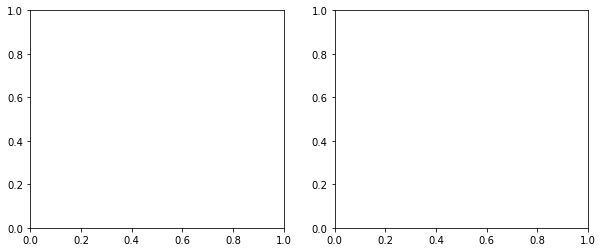

In [4]:
fig,(ax1,ax2)=plt.subplots(1,2, figsize=(10,4))

sns.scatterplot(x="AOD_440nm", y="440-870_Angstrom_Exponent",
               data=data ,ax=ax1)

sns.scatterplot(x="AOD_870nm", y="440-870_Angstrom_Exponent",
               data=data ,ax=ax2)

plt.show()

In [ ]:
import seaborn as sns
sns.set_theme(style="white")

df = sns.load_dataset("penguins")

g = sns.JointGrid(data=data, x='AOD_870nm', y="440-870_Angstrom_Exponent", space=0)
g.plot_joint(sns.kdeplot,
             fill=True, clip=((2200, 6800), (10, 25)),
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)

In [195]:
data.groupby('AERONET_Site_Name')['AOD_870nm','AOD_440nm',"440-870_Angstrom_Exponent"].agg(['mean', 'std'])

<ipython-input-195-525f141040f1>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('AERONET_Site_Name')['AOD_870nm','AOD_440nm',"440-870_Angstrom_Exponent"].agg(['mean', 'std'])


AOD_870nm           AOD_440nm            \
                         mean       std      mean       std   
AERONET_Site_Name                                             
ATHENS-NOA           0.097895  0.084398  0.222868  0.126652   
Barcelona            0.084055  0.065787  0.193311  0.124128   
Ben_Salem            0.138002  0.154539  0.206292  0.169437   
Birkenes             0.046682  0.036483  0.108273  0.084543   
Burjassot            0.084964  0.077497  0.180939  0.140854   
CUT-TEPAK            0.107776  0.089528  0.216462  0.118140   
Cabo_da_Roca         0.077464  0.075163  0.136474  0.106516   
El_Arenosillo        0.088499  0.093168  0.161116  0.121066   
Evora                0.069074  0.072702  0.134459  0.104205   
Finokalia-FKL        0.107415  0.097668  0.192137  0.115409   
Gozo                 0.123850  0.131975  0.197808  0.141716   
Granada              0.090934  0.095032  0.165920  0.111028   
Hamburg              0.098613  0.073757  0.235030  0.164300   
Helsinki             0.051078  0.036601  0.125886  0.092321   
Ispra                0.124026  0.126341  0.384386  0.340291   
Kuopio               0.052214  0.059422  0.127576  0.102423   
Lampedusa            0.126323  0.127443  0.199390  0.145848   
Lecce_University     0.095253  0.071695  0.215239  0.124884   
Leipzig              0.091996  0.068822  0.238165  0.163692   
Lille                0.098019  0.076166  0.232221  0.180236   
Madrid               0.060055  0.064160  0.128140  0.094474   
Mainz                0.089331  0.066990  0.225145  0.148413   
Minsk                0.084111  0.069993  0.217395  0.164213   
Modena               0.120981  0.090460  0.313437  0.194857   
Moldova              0.092362  0.067137  0.244777  0.155049   
Munich_University    0.075845  0.055814  0.201498  0.129538   
Palencia             0.056773  0.057536  0.126060  0.092130   
Palgrunden           0.050866  0.048109       NaN       NaN   
Palma_de_Mallorca    0.093537  0.088129  0.169281  0.114213   
Saada                0.156667  0.159419  0.224898  0.174615   
Santa_Cruz_Tenerife  0.127994  0.162487  0.169219  0.176171   
Tamanrasset_INM      0.225434  0.262293  0.259237  0.268777   
Thessaloniki         0.102538  0.072246  0.276822  0.163601   
Toulouse_MF          0.068687  0.059652  0.152324  0.106099   

                    440-870_Angstrom_Exponent            
                                         mean       std  
AERONET_Site_Name                                        
ATHENS-NOA                           1.318744  0.469487  
Barcelona                            1.278646  0.328949  
Ben_Salem                            0.843710  0.450729  
Birkenes                             1.265062  0.360012  
Burjassot                            1.199729  0.337368  
CUT-TEPAK                            1.161037  0.429527  
Cabo_da_Roca                         0.913081  0.423044  
El_Arenosillo                        1.038387  0.425120  
Evora                                1.117114  0.389860  
Finokalia-FKL                        1.013118  0.463158  
Gozo                                 0.909170  0.537370  
Granada                              1.110698  0.415618  
Hamburg                              1.297838  0.373832  
Helsinki                             1.302051  0.302996  
Ispra                                1.495154  0.301017  
Kuopio                               1.354038  0.320556  
Lampedusa                            0.868906  0.483963  
Lecce_University                     1.283237  0.419277  
Leipzig                              1.426614  0.312681  
Lille                                1.235912  0.388884  
Madrid                               1.252343  0.358085  
Mainz                                1.386185  0.316552  
Minsk                                1.429415  0.288695  
Modena                               1.469763  0.297208  
Moldova                              1.486730  0.293795  
Munich_University                    1.488327  0.313463  
Palenc

In [152]:
X

,AOD_870nm,440-870_Angstrom_Exponent
AERONET_Site_Name,,
ATHENS-NOA,0.097895,1.318744
Barcelona,0.084055,1.278646
Ben_Salem,0.138002,0.843710
Birkenes,0.046682,1.265062
Burjassot,0.084964,1.199729
Cabo_da_Roca,0.077464,0.913081
El_Arenosillo,0.088499,1.038387
Evora,0.069074,1.117114
Finokalia-FKL,0.107415,1.013118


<ipython-input-169-f82ee99512c7>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  X = data.groupby('AERONET_Site_Name')['AOD_870nm',"440-870_Angstrom_Exponent"].mean()


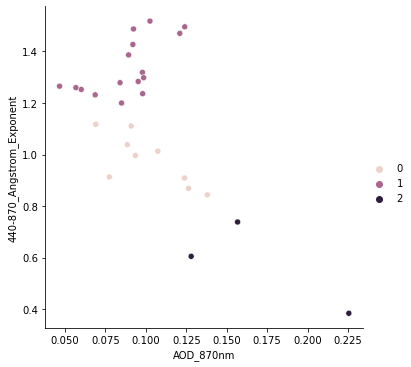

In [169]:
from sklearn.cluster import KMeans
X = data.groupby('AERONET_Site_Name')['AOD_870nm',"440-870_Angstrom_Exponent"].mean()

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

sns.relplot(x=X['AOD_870nm'],y=X["440-870_Angstrom_Exponent"], hue = kmeans.labels_, data=X)

In [148]:
kmeans.cluster_centers_

array([[0.10167764, 0.97893661],
       [0.08826447, 1.33775461],
       [0.17003176, 0.576276  ]])

## Reading one Aeronet file

In [69]:
df = pd.read_table('D:\SERGIO\Python\CARTEL_20210101_20211231.csv', delimiter=',',header = 6, na_values=(-999)) 

#df['date'] = df['Date(dd:mm:yyyy)']+ ' ' + df['Time(hh:mm:ss)']


##### reads name and coordinates of the site

Latitude = df["Site_Latitude(Degrees)"][1]
Longitude = df["Site_Longitude(Degrees)"][1]
Elevation = df["Site_Elevation(m)"][1]

##### prints name and coordinates of the site

print("Site :", df["AERONET_Site_Name"][1])
print("Site Coordinates (Lat_deg,Lon_deg, alt_m) :", Latitude, Longitude, Elevation)




df["date"] = pd.to_datetime(df['Date(dd:mm:yyyy)']+ ' ' + df['Time(hh:mm:ss)']
                            , format="%d:%m:%Y %H:%M:%S" , dayfirst=True)


df = df.set_index('date')


print ('initial data size : ', df.shape)
print ('Initial Date : ',df.index.min())
print ('Final Date : ',df.index.max())
print('data series length :',df.index.max() - df.index.min())


use_cols = ["AOD_1020nm","AOD_870nm", "AOD_675nm", 
            "AOD_500nm", "AOD_440nm", "440-870_Angstrom_Exponent",
            "AERONET_Site_Name","Site_Latitude(Degrees)",
           "Site_Longitude(Degrees)","Site_Elevation(m)"]

data = df[use_cols]

data.head()


Site : CARTEL
Site Coordinates (Lat_deg,Lon_deg, alt_m) : 45.379754 -71.93133 251.0
initial data size :  (8227, 113)
Initial Date :  2021-01-01 17:01:18
Final Date :  2021-10-20 19:55:50
data series length : 292 days 02:54:32


,AOD_1020nm,AOD_870nm,AOD_675nm,AOD_500nm,AOD_440nm,440-870_Angstrom_Exponent,AERONET_Site_Name,Site_Latitude(Degrees),Site_Longitude(Degrees),Site_Elevation(m)
date,,,,,,,,,,
2021-01-01 17:01:18,0.023062,0.026130,0.034447,0.052615,0.062495,1.294176,CARTEL,45.379754,-71.93133,251.0
2021-01-08 19:54:57,0.023412,0.026570,0.032687,0.047656,0.057209,1.133060,CARTEL,45.379754,-71.93133,251.0
2021-01-08 19:56:38,0.022376,0.025519,0.031289,0.045812,0.055144,1.139008,CARTEL,45.379754,-71.93133,251.0
2021-01-08 20:06:09,0.021677,0.024972,0.031057,0.045928,0.055222,1.174059,CARTEL,45.379754,-71.93133,251.0
2021-01-08 20:11:47,0.019357,0.022301,0.027885,0.041203,0.049151,1.171055,CARTEL,45.379754,-71.93133,251.0
